In [1]:
## import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [43]:
## load the dataset
data = pd.read_csv('M1_final.csv')
data.head(10)

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,...,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
0,11,1,5,B6,N828JB,CHS,-1,124,636,324,...,34,58,W,25,38,29.86,Fair / Windy,9,17,14
1,11,1,5,B6,N992JB,LAX,-7,371,2475,340,...,34,58,W,25,38,29.86,Fair / Windy,9,17,15
2,11,1,5,B6,N959JB,FLL,40,181,1069,301,...,34,58,W,25,38,29.86,Fair / Windy,9,17,22
3,11,1,5,B6,N999JQ,MCO,-2,168,944,345,...,34,58,W,25,38,29.86,Fair / Windy,9,17,12
4,11,1,5,DL,N880DN,ATL,-4,139,760,360,...,32,58,W,24,35,29.91,Fair / Windy,9,17,13
5,11,1,5,AA,N983NN,ORD,-1,161,740,359,...,32,58,W,24,35,29.91,Fair / Windy,9,17,21
6,11,1,5,AA,N107NN,LAX,-1,373,2475,360,...,32,58,W,24,35,29.91,Fair / Windy,9,17,26
7,11,1,5,B6,N274JB,BUF,-5,80,301,365,...,32,58,W,24,35,29.91,Fair / Windy,17,21,11
8,11,1,5,B6,N663JB,LGB,0,368,2465,365,...,32,58,W,24,35,29.91,Fair / Windy,17,21,25
9,11,1,5,B6,N283JB,FLL,3,184,1069,370,...,32,58,W,24,35,29.91,Fair / Windy,17,21,29


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28820 entries, 0 to 28819
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MONTH              28820 non-null  int64  
 1   DAY_OF_MONTH       28820 non-null  int64  
 2   DAY_OF_WEEK        28820 non-null  int64  
 3   OP_UNIQUE_CARRIER  28820 non-null  object 
 4   TAIL_NUM           28820 non-null  object 
 5   DEST               28820 non-null  object 
 6   DEP_DELAY          28820 non-null  int64  
 7   CRS_ELAPSED_TIME   28820 non-null  int64  
 8   DISTANCE           28820 non-null  int64  
 9   CRS_DEP_M          28820 non-null  int64  
 10  DEP_TIME_M         28820 non-null  int64  
 11  CRS_ARR_M          28820 non-null  int64  
 12  Temperature        28820 non-null  int64  
 13  Dew Point          28820 non-null  object 
 14  Humidity           28820 non-null  int64  
 15  Wind               28818 non-null  object 
 16  Wind Speed         288

In [4]:
## statistical summary of the dataset
data.describe()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,CRS_ARR_M,Temperature,Humidity,Wind Speed,Wind Gust,Pressure,sch_dep,sch_arr,TAXI_OUT
count,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000
mean,7.894240,16.021096,4.008952,6.374983,225.288203,1267.746079,831.003851,828.934698,910.874289,41.489833,57.732616,12.367627,5.535323,30.092433,31.091256,28.432130,20.858570
std,4.991723,8.750179,1.985230,38.735144,119.482417,889.343246,299.398525,305.864103,345.411743,8.043533,23.468676,6.259298,11.886457,0.296160,9.510359,8.263043,6.851915
min,1.000000,1.000000,1.000000,-22.000000,57.000000,94.000000,301.000000,1.000000,1.000000,17.000000,0.000000,0.000000,0.000000,29.200000,0.000000,0.000000,5.000000
25%,1.000000,8.000000,2.000000,-6.000000,124.000000,483.000000,545.000000,542.000000,667.000000,36.000000,46.000000,8.000000,0.000000,29.880000,26.000000,21.000000,16.000000
50%,11.000000,16.000000,4.000000,-3.000000,188.000000,1029.000000,856.000000,854.000000,918.000000,42.000000,59.000000,12.000000,0.000000,30.110000,30.000000,30.000000,19.000000
75%,12.000000,24.000000,6.000000,2.000000,365.000000,2248.000000,1095.000000,1097.000000,1193.000000,47.000000,74.000000,16.000000,0.000000,30.320000,37.000000,35.000000,25.000000
max,12.000000,31.000000,7.000000,1276.000000,697.000000,4983.000000,1439.000000,1440.000000,1439.000000,68.000000,97.000000,36.000000,49.000000,30.750000,55.000000,46.000000,41.000000


In [40]:
data['Dew Point'] = data['Dew Point'].astype(int)

<function matplotlib.pyplot.show(close=None, block=None)>

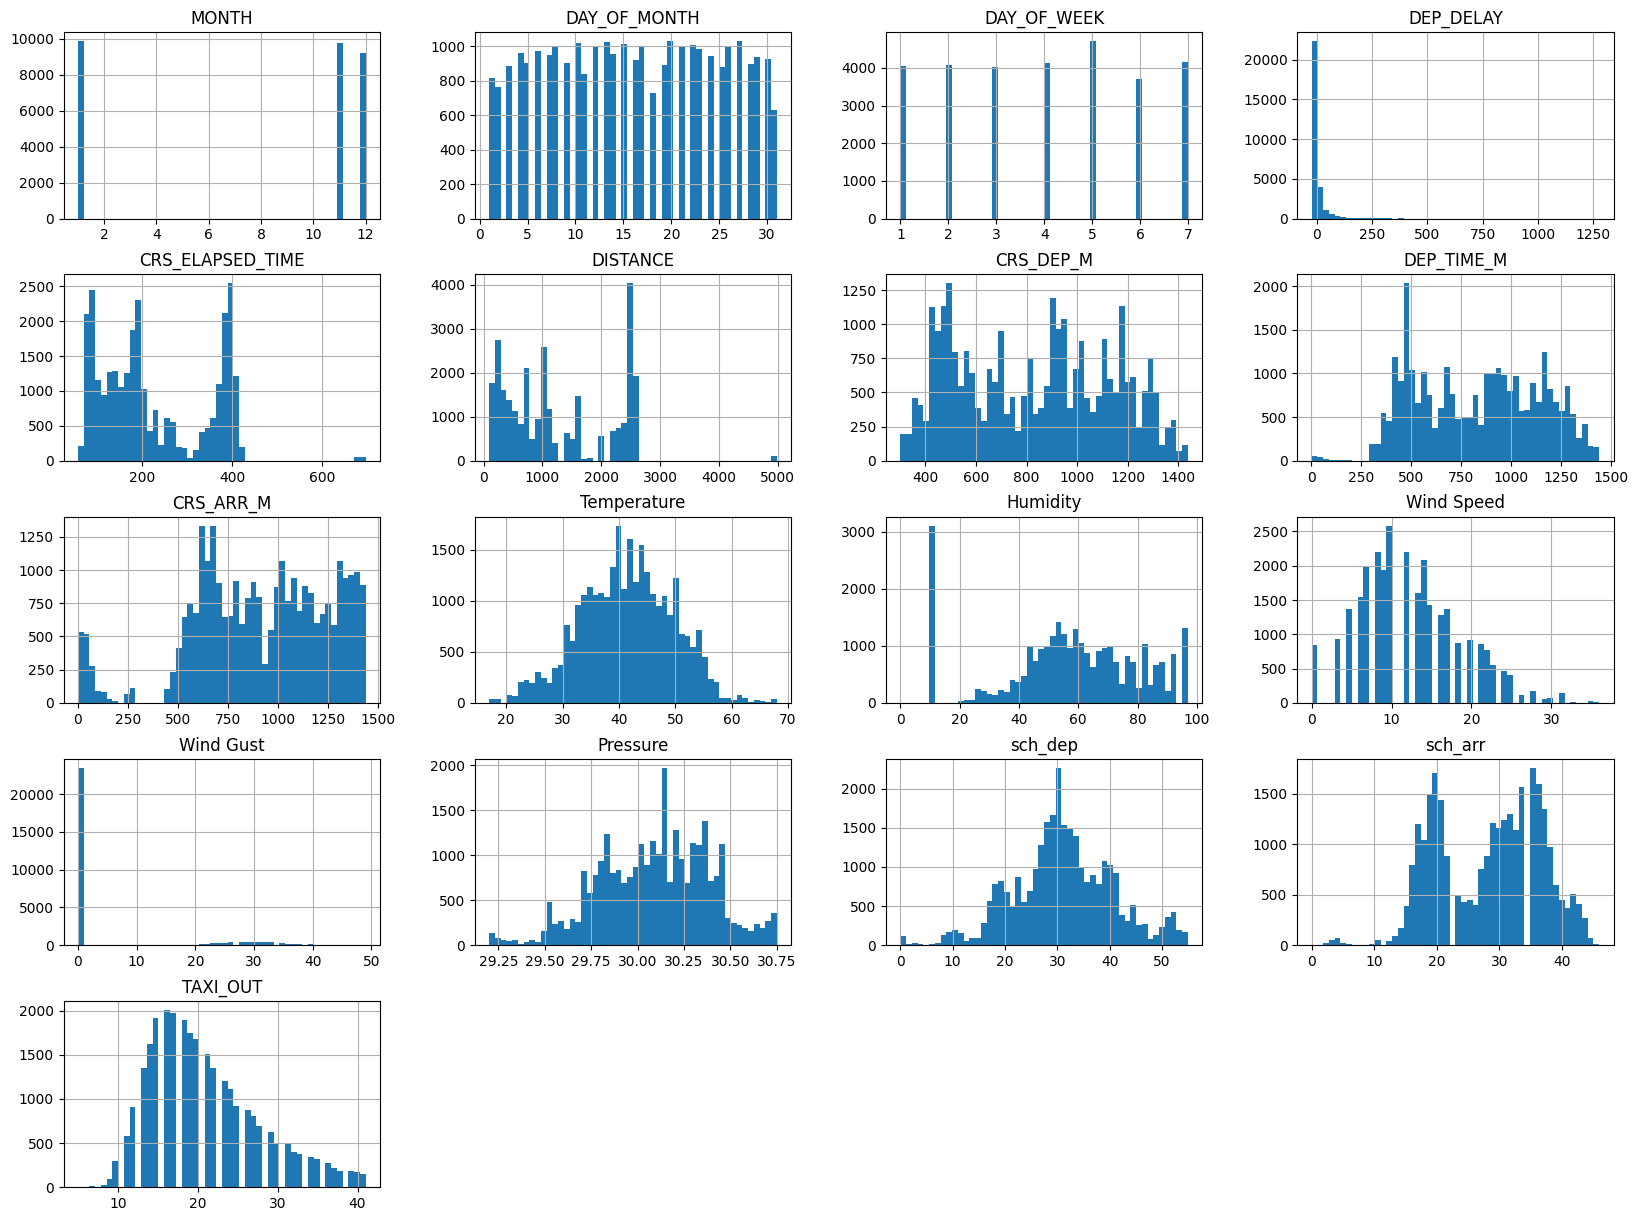

In [45]:
data.hist(bins=50, figsize=(20, 15))
plt.show

In [5]:
## Exploratory Data Analysis (EDA)
## show correlation matix
corr_mat = data.corr(numeric_only=True)
corr_mat

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,CRS_ARR_M,Temperature,Humidity,Wind Speed,Wind Gust,Pressure,sch_dep,sch_arr,TAXI_OUT
MONTH,1.000000,-0.007254,0.029365,0.046455,-0.016052,-0.000144,0.001824,0.002632,-0.012361,0.135682,0.012515,-0.035097,-0.051014,-0.085274,-0.006191,-0.019705,0.018505
DAY_OF_MONTH,-0.007254,1.000000,-0.029732,-0.036618,0.002761,-0.002762,0.001754,0.004446,0.008519,-0.132457,0.096215,-0.093211,-0.088991,0.016871,-0.003417,0.002223,-0.023990
DAY_OF_WEEK,0.029365,-0.029732,1.000000,-0.006203,0.000413,0.002450,0.005411,0.008256,-0.003339,0.013081,0.001627,0.095943,0.127689,0.102289,0.024415,0.009621,0.028388
DEP_DELAY,0.046455,-0.036618,-0.006203,1.000000,-0.030871,-0.031507,0.102384,0.072340,0.043691,-0.032261,-0.011776,0.067718,0.044340,-0.064939,-0.065452,-0.006949,0.034881
CRS_ELAPSED_TIME,-0.016052,0.002761,0.000413,-0.030871,1.000000,0.994465,-0.031332,-0.021391,0.035186,-0.016050,0.017198,-0.013440,-0.011934,0.010165,0.083426,-0.067669,0.070838
DISTANCE,-0.000144,-0.002762,0.002450,-0.031507,0.994465,1.000000,-0.040963,-0.034604,0.008520,-0.009923,0.015110,-0.010734,-0.009522,0.005692,0.059174,-0.088793,0.059856
CRS_DEP_M,0.001824,0.001754,0.005411,0.102384,-0.031332,-0.040963,1.000000,0.946023,0.452476,0.086371,0.003843,0.008063,-0.009887,-0.008285,-0.025621,0.495286,0.044864
DEP_TIME_M,0.002632,0.004446,0.008256,0.072340,-0.021391,-0.034604,0.946023,1.000000,0.469758,0.098105,-0.005923,0.006033,-0.014336,-0.009410,0.025609,0.544197,0.057896
CRS_ARR_M,-0.012361,0.008519,-0.003339,0.043691,0.035186,0.008520,0.452476,0.469758,1.000000,0.101620,-0.033163,0.014180,0.004486,-0.012682,0.149903,0.424209,0.071377
Temperature,0.135682,-0.132457,0.013081,-0.032261,-0.016050,-0.009923,0.086371,0.098105,0.101620,1.000000,0.054401,0.010603,-0.039487,-0.376730,-0.022534,0.075958,-0.067574


<Axes: >

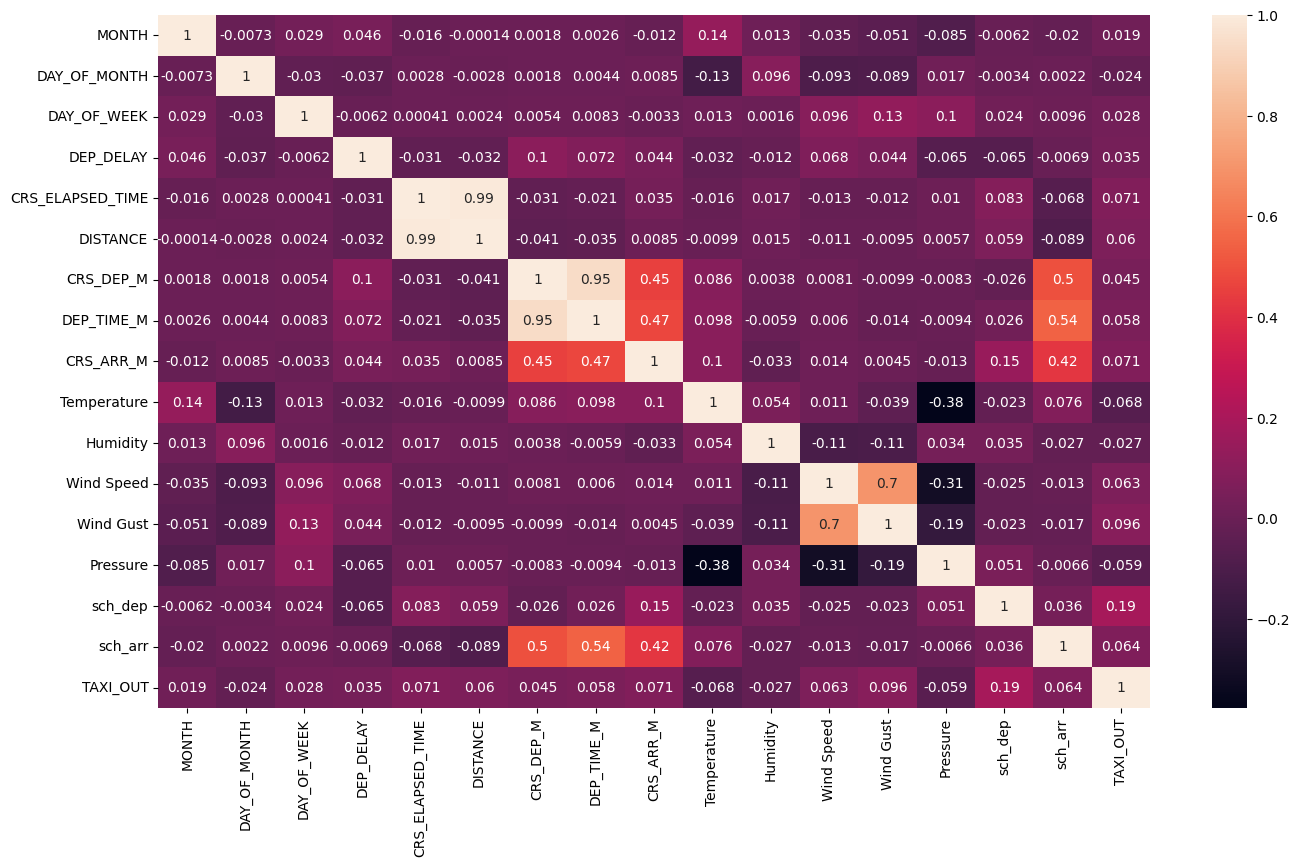

In [37]:
## plot the heatmap
plt.figure(figsize=(16,9))
sns.heatmap(corr_mat, annot=True)

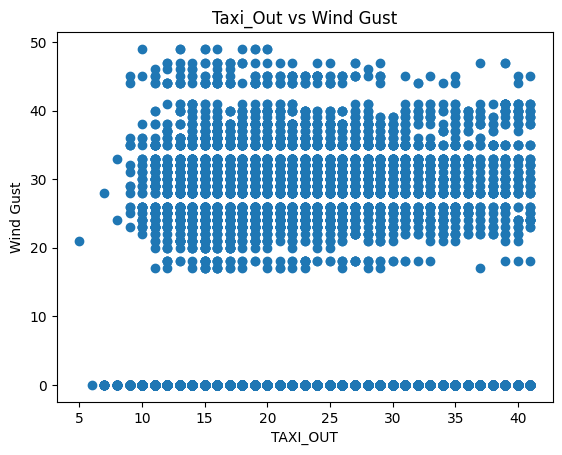

In [48]:
## scatter plot to see relationship
plt.scatter(data['TAXI_OUT'], data['Wind Gust'])
plt.xlabel('TAXI_OUT')
plt.ylabel('Wind Gust')
plt.title('Taxi_Out vs Wind Gust')
plt.show()

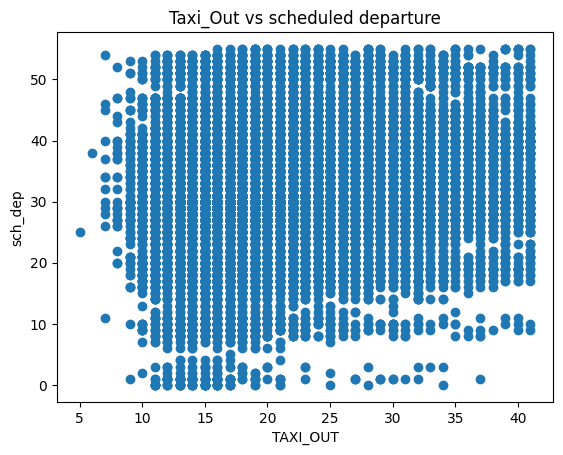

In [47]:
## scatter plot to see relationship
plt.scatter(data['TAXI_OUT'], data['sch_dep'])
plt.xlabel('TAXI_OUT')
plt.ylabel('sch_dep')
plt.title('Taxi_Out vs scheduled departure')
plt.show()

In [16]:
data.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,...,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
0,11,1,5,B6,N828JB,CHS,-1,124,636,324,...,34,58,W,25,38,29.86,Fair / Windy,9,17,14
1,11,1,5,B6,N992JB,LAX,-7,371,2475,340,...,34,58,W,25,38,29.86,Fair / Windy,9,17,15
2,11,1,5,B6,N959JB,FLL,40,181,1069,301,...,34,58,W,25,38,29.86,Fair / Windy,9,17,22
3,11,1,5,B6,N999JQ,MCO,-2,168,944,345,...,34,58,W,25,38,29.86,Fair / Windy,9,17,12
4,11,1,5,DL,N880DN,ATL,-4,139,760,360,...,32,58,W,24,35,29.91,Fair / Windy,9,17,13


In [20]:
x = data.iloc[:, [-3,-6]]
y = data.iloc[:, -1]

In [21]:
## splitting our data
## 80% training 20% for testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state=32)


In [22]:
x_train

,sch_dep,Wind Gust
20654,26,0
5145,25,0
7954,34,0
17345,41,0
1966,52,0
...,...,...
20414,30,23
27516,37,25
9526,19,0
9771,11,0


In [23]:
x_test.shape

(5764, 2)

In [42]:
## standard scaler 
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [25]:
x_train

array([[-0.53986772, -0.46433733],
       [-0.64467557, -0.46433733],
       [ 0.2985951 , -0.46433733],
       ...,
       [-1.27352268, -0.46433733],
       [-2.11198549, -0.46433733],
       [-0.43505986, -0.46433733]])

In [26]:
x_test

array([[ 0.5082108 , -0.46433733],
       [ 0.7178265 ,  3.49766858],
       [ 0.82263435,  1.89600662],
       ...,
       [-0.12063631,  2.31749661],
       [-1.27352268, -0.46433733],
       [ 0.9274422 , -0.46433733]])

In [27]:
##  multiple linear regression
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

LinearRegression()

In [29]:
## make a prediction
y_pred = lin_reg.predict(x_test)

In [30]:
y_pred

array([21.210632  , 24.19783422, 23.24085269, ..., 22.28199897,
       18.85488994, 21.76492425])

In [31]:
## create a dataframe for prediction
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

,Actual,Predicted
9362,23,21.210632
23840,14,24.197834
24617,22,23.240853
24899,19,24.407098
2007,20,20.379194
...,...,...
25685,18,20.517767
376,16,21.210632
10922,34,22.281999
7106,17,18.854890


In [32]:
## nmodel evaluation
## Mean Absolute Error
## Mean Square Error
## Root Mean Square Error
# Rsquared

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2:', metrics.r2_score(y_test, y_pred))

MAE: 5.386218427923729
MSE: 45.81502641314892
RMSE: 6.768679813165114
R2: 0.044117578440439176
